In [1]:

import numpy as np
import pandas as pd
import seaborn as sns


from moseq2_lda.data import load_representations
from moseq2_lda.model import create_lda_pipeline, run_cross_validation, train_lda_pipeline, train_lda_model
from moseq2_lda.viz import plot_lda_results, plot_validation_curve, plot_permutation_score
from matplotlib import pyplot as plt
#%matplotlib qt

In [2]:
model_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\PvFlpO_Lbx1Cre_DTR\2021-12-02_modelling\rST_model_1000.p"
index_file = r"H:\Tischfield_Lab_ISI\MoSeq\moseq2\Analysis\PvFlpO_Lbx1Cre_DTR\2021-12-02_modelling\moseq2-index.sex-role.yaml"

max_syllable = 57

groups = [
    'M_Ctr',
    'M_Exp'
]

In [3]:
representations = load_representations(index_file, model_file, max_syllable=max_syllable, groups=groups)
palette = sns.color_palette('deep', n_colors=len(groups))
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P', 'D', 'X', '*', 'h', 'H', 'd'][:len(groups)]

pruned 2286 transitions which are never used


In [4]:
train, test = representations.split(0.3)

# Create a LDA pipeline, passing along with any parameters the user supplied
estimator = create_lda_pipeline(**{"n_components": 1, "shrinkage": 'auto'})

# train the model on the train subset
final = train_lda_model(estimator, train, 'usages')

LDA Score: 1.0
LDA Explained Variance: [1.0965656]
              precision    recall  f1-score   support

       M_Ctr       1.00      1.00      1.00         9
       M_Exp       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



(<Figure size 1800x1440 with 5 Axes>,
 array([[<AxesSubplot:title={'center':'LDA'}, xlabel='LDA_1', ylabel='Density'>,
         <AxesSubplot:title={'center':'LDA'}, xlabel='Group', ylabel='LDA_1'>],
        [<AxesSubplot:title={'center':'LDA Classification Confusion Matrix'}, xlabel='Predicted Label', ylabel='True Label'>,
         <AxesSubplot:>]], dtype=object),
                                     uuid  group  \
 0   00d28248-72e2-4fc8-b604-5cb4d541f5aa  M_Exp   
 1   0b39d12a-7bb1-4654-9a4b-36d94190be67  M_Ctr   
 2   0eb37010-3ee0-478c-a320-6790fba64a92  M_Exp   
 3   11a7f4d3-889f-41d8-aec5-54ab7f70dd64  M_Ctr   
 4   138006f5-a7ac-4945-ae30-9fb4d47513d6  M_Ctr   
 5   3ef93835-6dca-4893-82f2-348eda572c4f  M_Exp   
 6   4e5aacdd-9d4b-4e86-87b1-84578ba25578  M_Ctr   
 7   5c7e204a-4fc4-4c7f-aefb-85abeac213ff  M_Exp   
 8   8a9bc140-5b7f-4331-aa73-3904895c715e  M_Exp   
 9   94143279-b5ef-4b8f-85ab-f7819e005f2f  M_Exp   
 10  993dacc3-d6b4-49ba-bcf7-bcfa90605419  M_Ctr   
 11  a02e

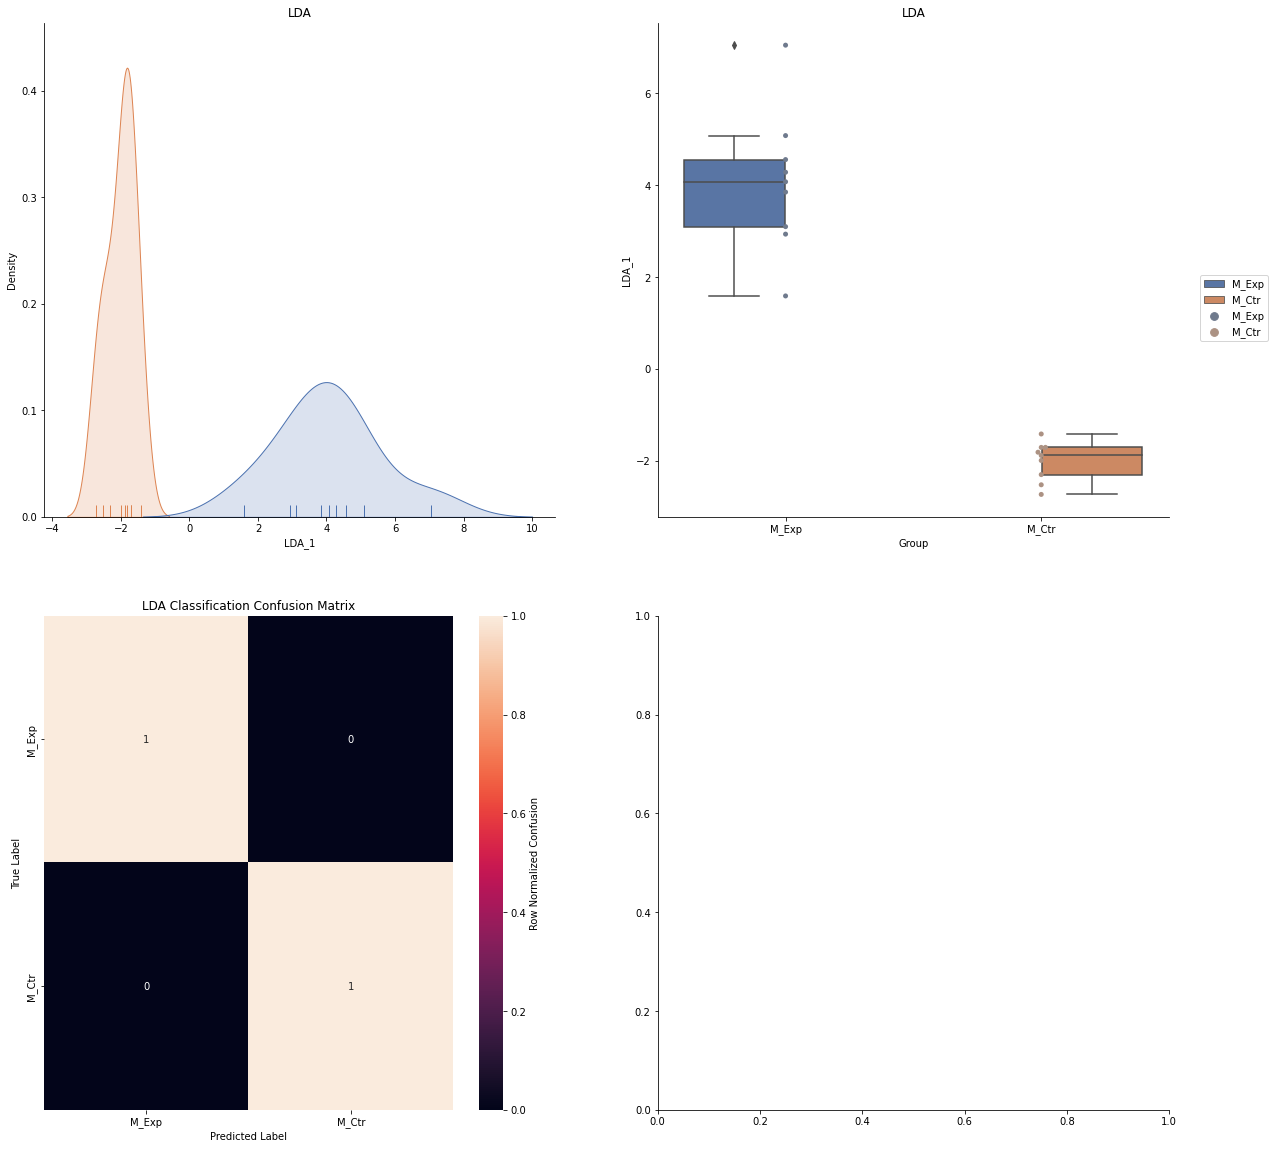

In [5]:
plot_lda_results(final, representations)